In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [56]:
from sklearn.decomposition import PCA

In [52]:
import pandas as pd
from sqlalchemy import create_engine
user = 'postgres'
password = '368545'
host = 'localhost'
port = '5432'
database = 'telecom'
connection_str = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_str)
sql_query = 'SELECT * FROM xdr_data'
df = pd.read_sql(sql_query, con= engine)
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [53]:
df['Dur. (ms)']
df['Dur. (ms).1']

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df['Handset Type'].value_counts().nlargest(10)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [5]:
df['Handset Manufacturer'].value_counts().head(3)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [9]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
top_handsets_by_manufacturer = pd.DataFrame(columns=['Manufacturer', 'Handset Type', 'Count'])
for manufacturer in top_manufacturers:
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_handsets_df = pd.DataFrame({'Manufacturer': [manufacturer] * len(top_handsets.index),
                                     'Handset Type': top_handsets.index,
                                     'Count': top_handsets.values})
    top_handsets_by_manufacturer = pd.concat([top_handsets_by_manufacturer, top_handsets_df])
top_handsets_by_manufacturer

,Manufacturer,Handset Type,Count
0,Apple,Apple iPhone 6S (A1688),9419
1,Apple,Apple iPhone 6 (A1586),9023
2,Apple,Apple iPhone 7 (A1778),6326
3,Apple,Apple iPhone Se (A1723),5187
4,Apple,Apple iPhone 8 (A1905),4993
0,Samsung,Samsung Galaxy S8 (Sm-G950F),4520
1,Samsung,Samsung Galaxy A5 Sm-A520F,3724
2,Samsung,Samsung Galaxy J5 (Sm-J530),3696
3,Samsung,Samsung Galaxy J3 (Sm-J330),3484
4,Samsung,Samsung Galaxy S7 (Sm-G930X),3199


In [24]:
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Add 'Bearer Id' to track the number of xDR sessions
application_columns.append('Bearer Id')

# Create a new DataFrame with the selected columns
filtered_df = df[['MSISDN/Number'] + application_columns]
filtered_df

# Group by user and aggregate the required information
user_behavior_aggregated = filtered_df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                    # Number of xDR sessions
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the aggregated information per user
print("Aggregated User Behavior:")
user_behavior_aggregated

Aggregated User Behavior:


,MSISDN/Number,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,1,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,234320.0,65863.0,8294310.0,18353533.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0,291391283.0,3891534.0
106852,3.379000e+10,1,442214.0,56355.0,5596862.0,14254710.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0,204636073.0,6479040.0
106853,3.197021e+12,1,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0,467678100.0,2848373.0
106854,3.370000e+14,1,496337.0,25229.0,16690728.0,20044212.0,9983678.0,20921364.0,8215537.0,1615080.0,2989663.0,328919.0,5.012590e+08,8883653.0,144354057.0,4834382.0


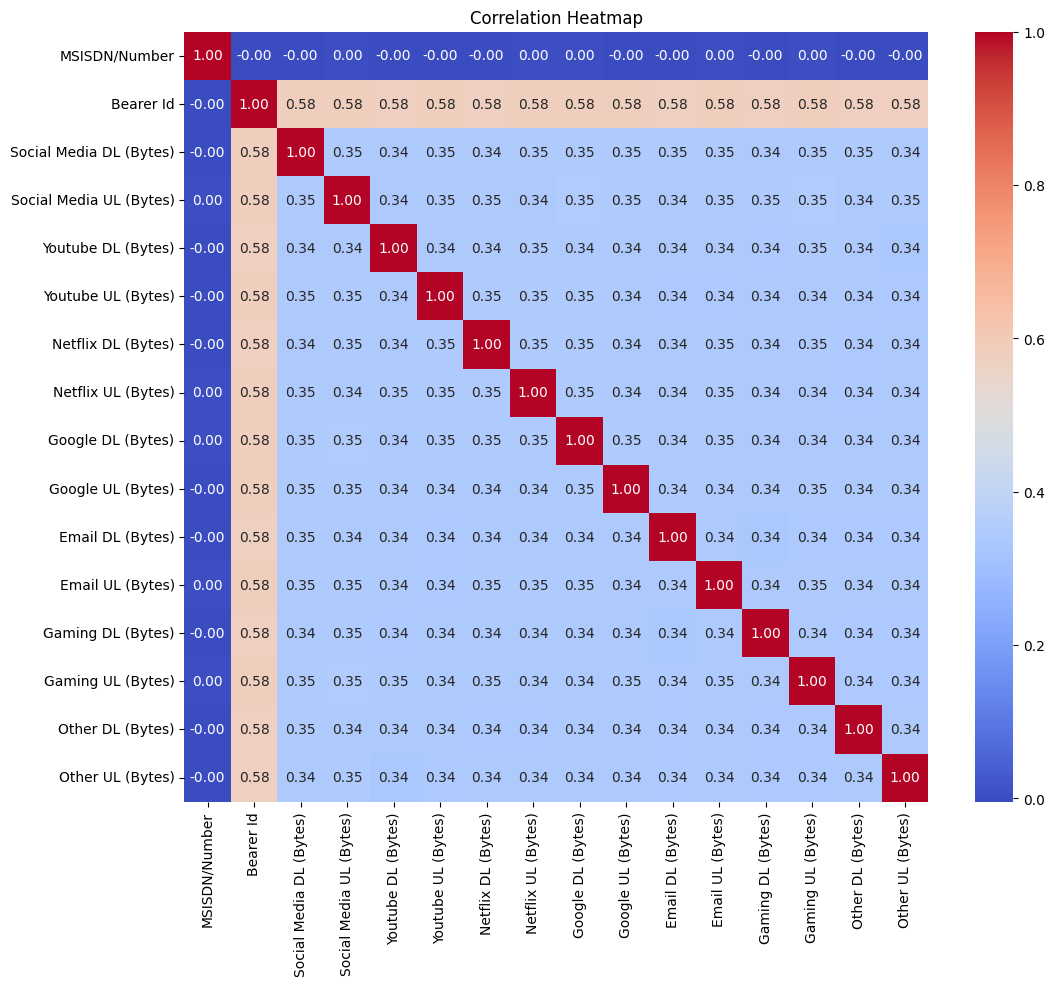

Summary Statistics:
       MSISDN/Number      Bearer Id  Social Media DL (Bytes)  \
count   1.010370e+05  101037.000000             1.010370e+05   
mean    3.370530e+10       1.244841             2.240197e+06   
std     9.952017e+09       0.478745             1.423070e+06   
min     3.360100e+10       0.000000             1.200000e+01   
25%     3.365080e+10       1.000000             1.118019e+06   
50%     3.366363e+10       1.000000             2.154659e+06   
75%     3.368337e+10       1.000000             3.121398e+06   
max     3.197021e+12       3.000000             8.137536e+06   

       Social Media UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            101037.000000        1.010370e+05        1.010370e+05   
mean              41080.246128        1.449137e+07        1.373690e+07   
std               26210.299075        9.223062e+06        8.719681e+06   
min                   0.000000        5.300000e+01        1.060000e+02   
25%               20441.000000   

In [30]:
user_behavior_aggregated.describe()
numerical_columns = user_behavior_aggregated.select_dtypes(include='number').columns
non_numerical_columns = user_behavior_aggregated.select_dtypes(exclude='number').columns

# # Replace missing values with the median for numerical columns
user_behavior_aggregated[numerical_columns] = user_behavior_aggregated[numerical_columns].fillna(user_behavior_aggregated[numerical_columns].median())

# # Replace missing values with the mode for non-numerical columns
# user_behavior_aggregated[non_numerical_columns] = user_behavior_aggregated[non_numerical_columns].fillna(user_behavior_aggregated[non_numerical_columns].mode().iloc[0])

# Identify and treat outliers by replacing them with the mean
z_scores = zscore(df.select_dtypes(include='number'))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

# # Replace outlier values with the mean
df.loc[~filtered_entries, numerical_columns] = df[numerical_columns].mean()

# # Basic statistics and visualizations
summary_statistics = df.describe()
summary_statistics

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(summary_statistics)

In [31]:
variable_info = pd.DataFrame(columns=['Variable', 'Data Type'])

# Populate the DataFrame with variable names and data types
variable_info['Variable'] = summary_statistics.columns
variable_info['Data Type'] = summary_statistics.dtypes.values

# Display the summary table
print("Relevant Variables and Data Types:")
print(variable_info)

Relevant Variables and Data Types:
                   Variable Data Type
0             MSISDN/Number   float64
1                 Bearer Id   float64
2   Social Media DL (Bytes)   float64
3   Social Media UL (Bytes)   float64
4        Youtube DL (Bytes)   float64
5        Youtube UL (Bytes)   float64
6        Netflix DL (Bytes)   float64
7        Netflix UL (Bytes)   float64
8         Google DL (Bytes)   float64
9         Google UL (Bytes)   float64
10         Email DL (Bytes)   float64
11         Email UL (Bytes)   float64
12        Gaming DL (Bytes)   float64
13        Gaming UL (Bytes)   float64
14         Other DL (Bytes)   float64
15         Other UL (Bytes)   float64


In [32]:
basic_metrics = summary_statistics.describe().transpose()[['mean', '50%', 'std', 'min', 'max']]
basic_metrics['IQR'] = summary_statistics.quantile(0.75) - summary_statistics.quantile(0.25)

# Display the basic metrics
print("Basic Metrics for Each Variable:")
print(basic_metrics)

Basic Metrics for Each Variable:
                                 mean           50%           std       min  \
MSISDN/Number            4.219096e+11  3.365721e+10  1.121392e+12  101037.0   
Bearer Id                1.263059e+04  1.000000e+00  3.572158e+04       0.0   
Social Media DL (Bytes)  2.286991e+06  1.788865e+06  2.593022e+06      12.0   
Social Media UL (Bytes)  5.444094e+04  4.030962e+04  4.874189e+04       0.0   
Youtube DL (Bytes)       1.479188e+07  1.156117e+07  1.700571e+07      53.0   
Youtube UL (Bytes)       1.398597e+07  1.096858e+07  1.603555e+07     106.0   
Netflix DL (Bytes)       1.477846e+07  1.158864e+07  1.699405e+07      42.0   
Netflix UL (Bytes)       1.397883e+07  1.097226e+07  1.603940e+07      35.0   
Google DL (Bytes)        7.312546e+06  5.724497e+06  8.377142e+06     207.0   
Google UL (Bytes)        2.624006e+06  2.049717e+06  2.992538e+06       3.0   
Email DL (Bytes)         2.288864e+06  1.786711e+06  2.606252e+06      97.0   
Email UL (Bytes)   

In [33]:
quantitative_variables = df.select_dtypes(include='number')

# Compute dispersion parameters for each quantitative variable
dispersion_parameters = pd.DataFrame(index=quantitative_variables.columns)
dispersion_parameters['Mean'] = quantitative_variables.mean()
dispersion_parameters['Median'] = quantitative_variables.median()
dispersion_parameters['Standard Deviation'] = quantitative_variables.std()
dispersion_parameters['Variance'] = quantitative_variables.var()
dispersion_parameters['Range'] = quantitative_variables.max() - quantitative_variables.min()

# Display the dispersion parameters
print("Dispersion Parameters for Each Quantitative Variable:")
print(dispersion_parameters)

Dispersion Parameters for Each Quantitative Variable:
                                 Mean        Median  Standard Deviation  \
MSISDN/Number            3.370530e+10  3.366363e+10        9.952017e+09   
Bearer Id                1.244841e+00  1.000000e+00        4.787450e-01   
Social Media DL (Bytes)  2.240197e+06  2.154659e+06        1.423070e+06   
Social Media UL (Bytes)  4.108025e+04  3.953900e+04        2.621030e+04   
Youtube DL (Bytes)       1.449137e+07  1.389927e+07        9.223062e+06   
Youtube UL (Bytes)       1.373690e+07  1.321749e+07        8.719681e+06   
Netflix DL (Bytes)       1.447942e+07  1.394909e+07        9.228198e+06   
Netflix UL (Bytes)       1.372299e+07  1.319511e+07        8.749402e+06   
Google DL (Bytes)        7.171391e+06  6.900876e+06        4.548118e+06   
Google UL (Bytes)        2.562767e+06  2.467721e+06        1.631713e+06   
Email DL (Bytes)         2.232161e+06  2.156286e+06        1.417136e+06   
Email UL (Bytes)         5.826324e+05  5.58936

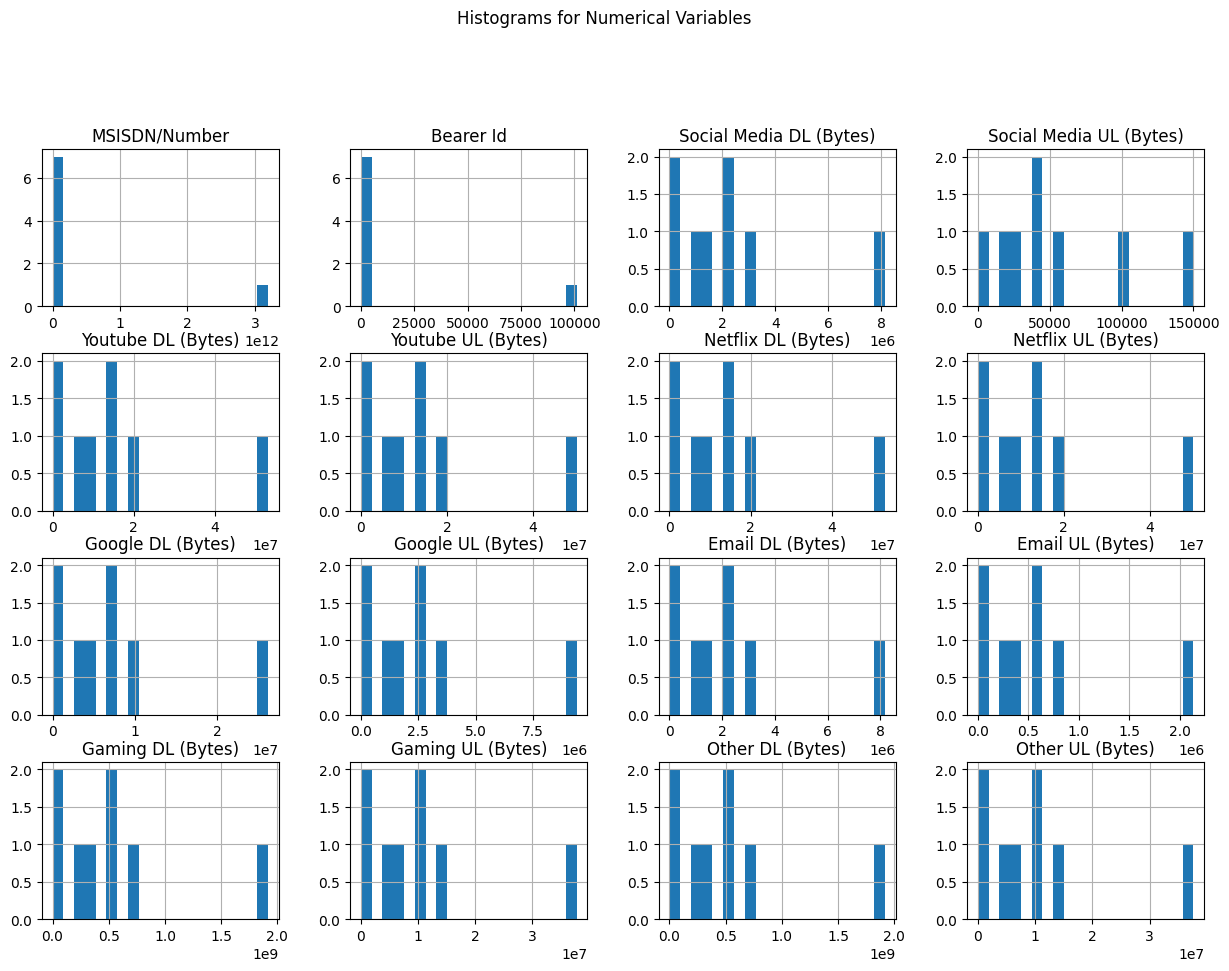

In [34]:
numerical_variables = summary_statistics.select_dtypes(include='number')

# Plot histograms for numerical variables
numerical_variables.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Variables', y=1.02)
plt.show()

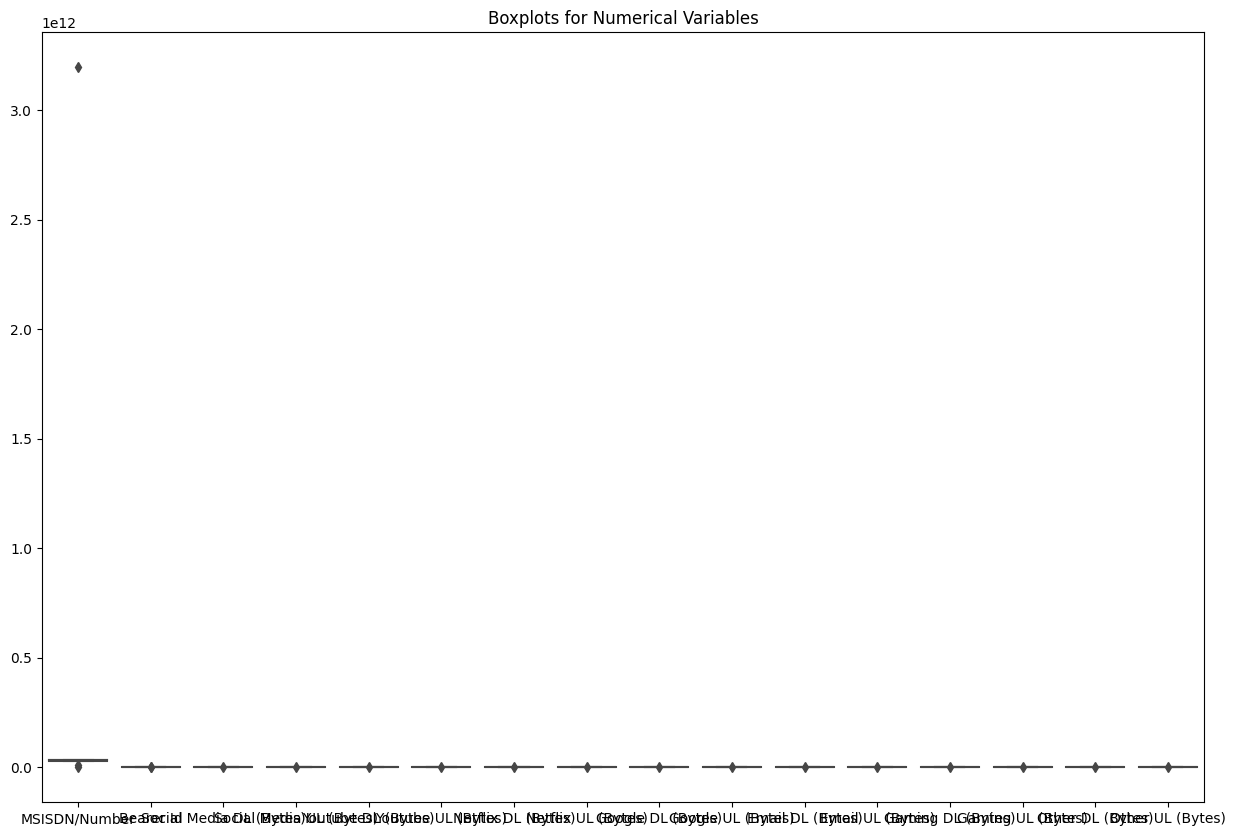

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_variables)
plt.title('Boxplots for Numerical Variables')
plt.show()

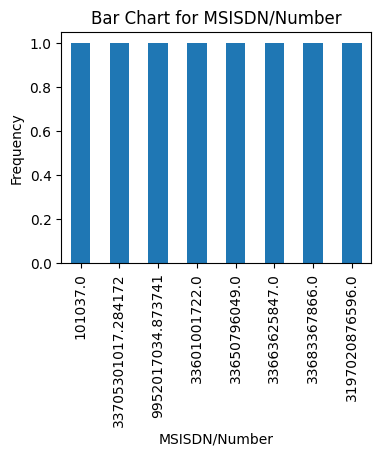

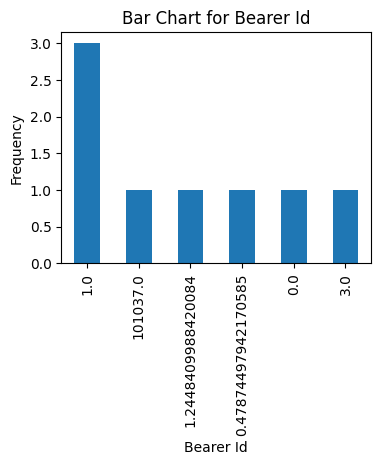

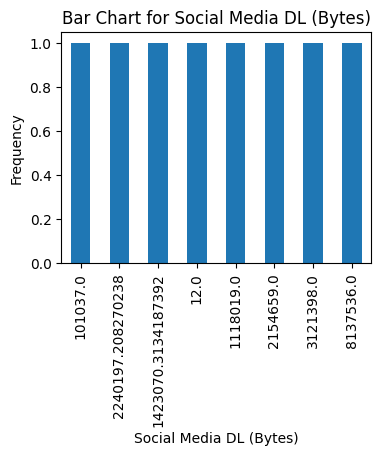

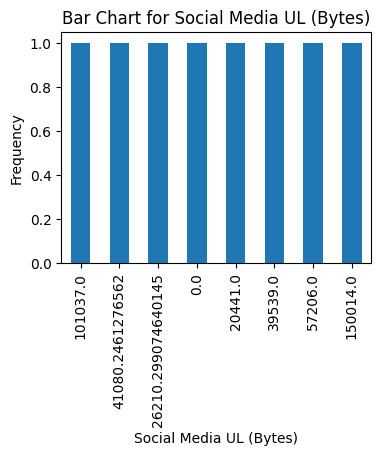

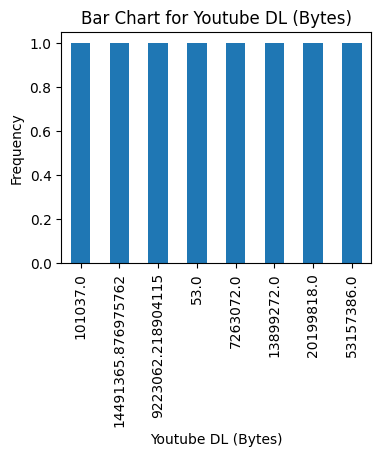

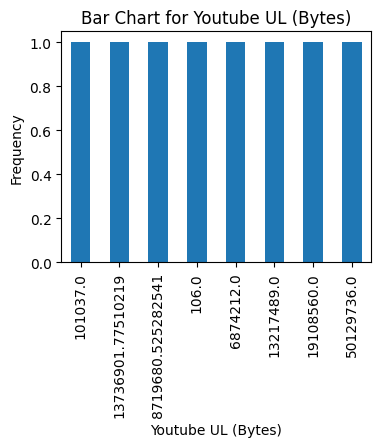

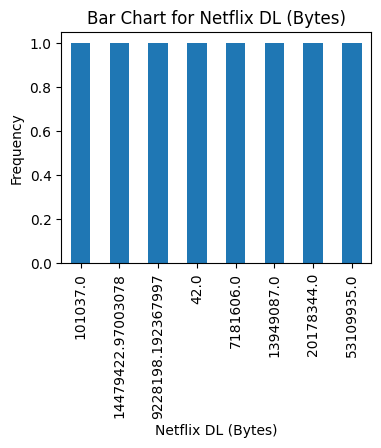

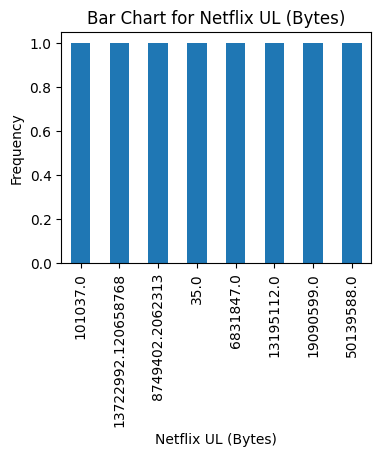

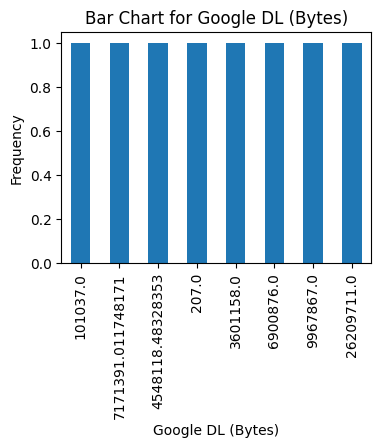

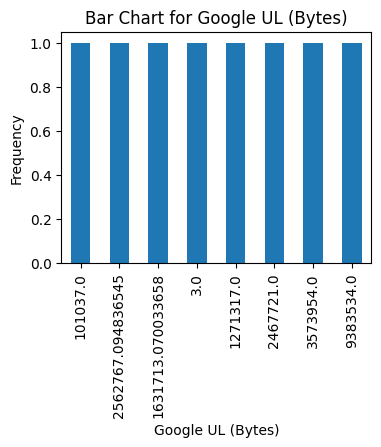

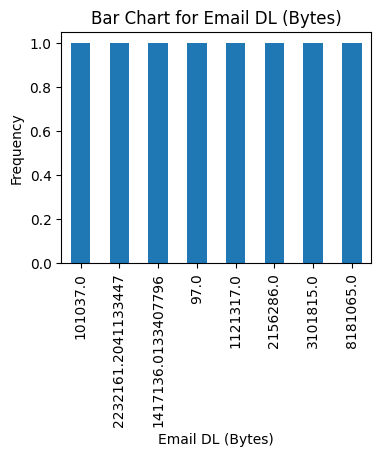

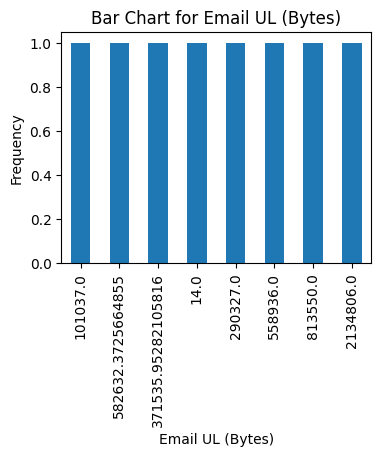

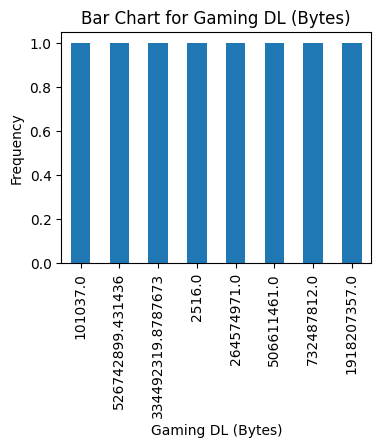

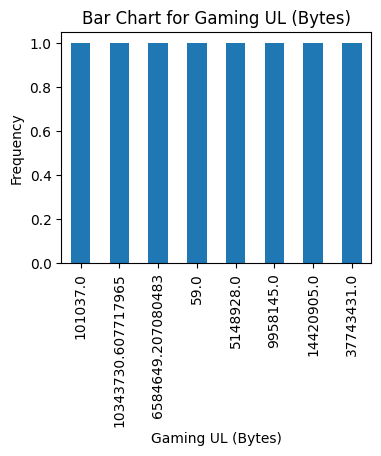

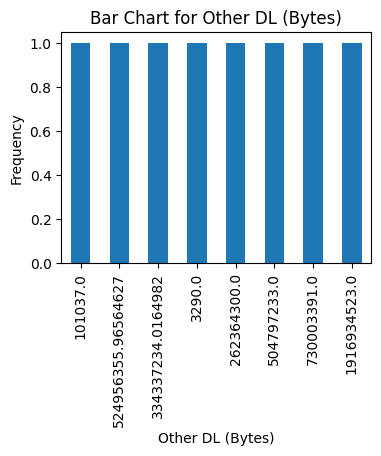

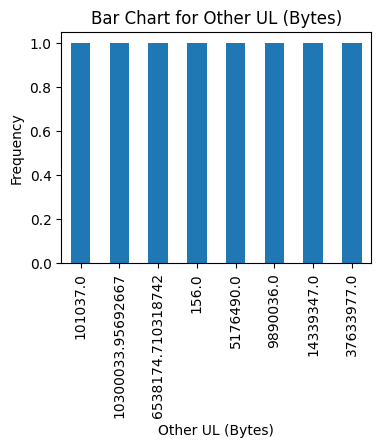

In [40]:
categorical_variables = summary_statistics.select_dtypes(include='number')

# Plot bar charts for categorical variables
for column in categorical_variables.columns:
    plt.figure(figsize=(4, 3))
    summary_statistics[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

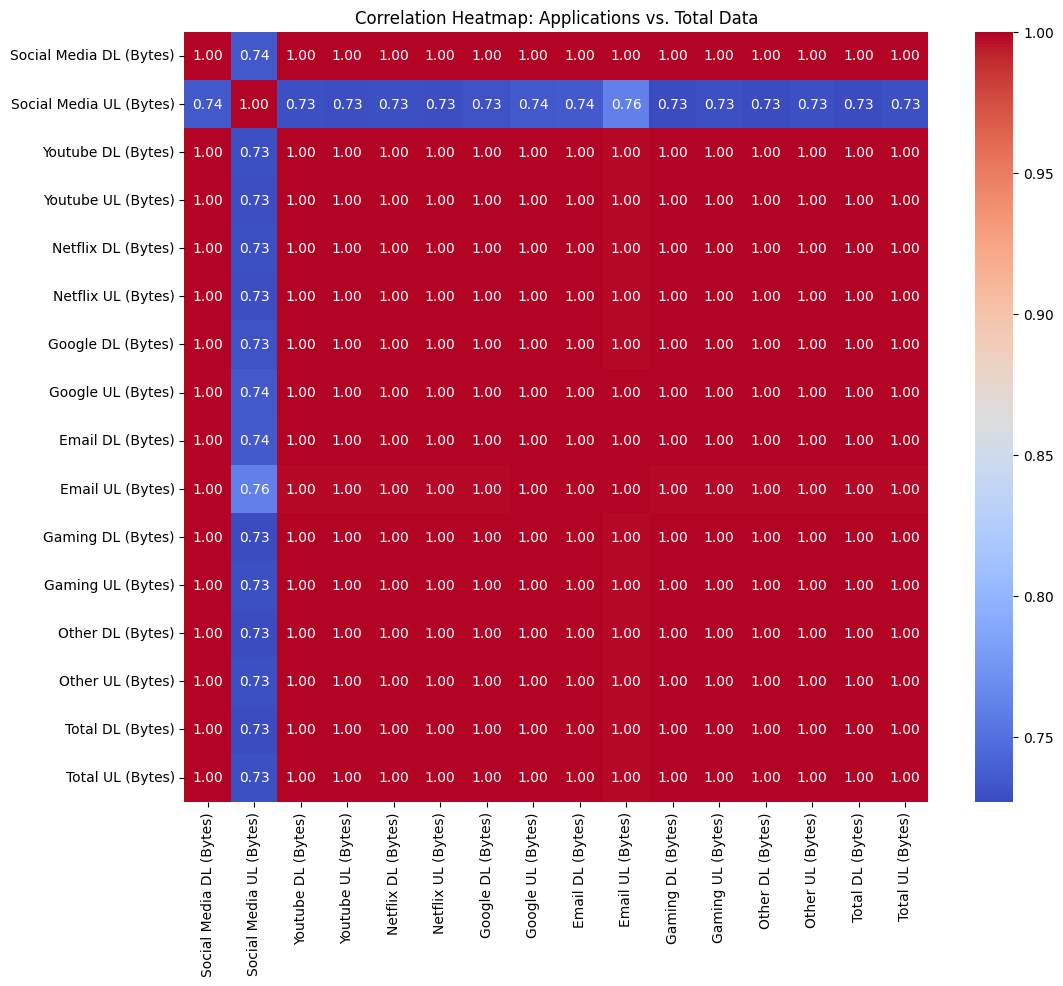

In [42]:
applications_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                         'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                         'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                         'Google DL (Bytes)', 'Google UL (Bytes)',
                         'Email DL (Bytes)', 'Email UL (Bytes)',
                         'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                         'Other DL (Bytes)', 'Other UL (Bytes)']

total_data_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']
summary_statistics['Total DL (Bytes)'] = summary_statistics['Social Media DL (Bytes)'] + summary_statistics['Youtube DL (Bytes)'] + summary_statistics['Netflix DL (Bytes)'] + summary_statistics['Google DL (Bytes)'] + summary_statistics['Email DL (Bytes)'] + summary_statistics['Gaming DL (Bytes)'] + summary_statistics['Other DL (Bytes)']
summary_statistics['Total UL (Bytes)'] = summary_statistics['Social Media UL (Bytes)'] + summary_statistics['Youtube UL (Bytes)'] + summary_statistics['Netflix UL (Bytes)'] + summary_statistics['Google UL (Bytes)'] + summary_statistics['Email UL (Bytes)'] + summary_statistics['Gaming UL (Bytes)'] + summary_statistics['Other UL (Bytes)']

# Combine selected columns for analysis
selected_columns = applications_columns + total_data_columns
selected_data = summary_statistics[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Applications vs. Total Data')
plt.show()

In [45]:
summary_statistics

,MSISDN/Number,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,1.010370e+05,101037.000000,1.010370e+05,101037.000000,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,1.010370e+05,7.072590e+05,7.072590e+05
mean,3.370530e+10,1.244841,2.240197e+06,41080.246128,1.449137e+07,1.373690e+07,1.447942e+07,1.372299e+07,7.171391e+06,2.562767e+06,2.232161e+06,5.826324e+05,5.267429e+08,1.034373e+07,5.249564e+08,1.030003e+07,1.092314e+09,5.129014e+07
std,9.952017e+09,0.478745,1.423070e+06,26210.299075,9.223062e+06,8.719681e+06,9.228198e+06,8.749402e+06,4.548118e+06,1.631713e+06,1.417136e+06,3.715360e+05,3.344923e+08,6.584649e+06,3.343372e+08,6.538175e+06,6.946691e+08,3.262137e+07
min,3.360100e+10,0.000000,1.200000e+01,0.000000,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,6.217000e+03,3.730000e+02
25%,3.365080e+10,1.000000,1.118019e+06,20441.000000,7.263072e+06,6.874212e+06,7.181606e+06,6.831847e+06,3.601158e+06,1.271317e+06,1.121317e+06,2.903270e+05,2.645750e+08,5.148928e+06,2.623643e+08,5.176490e+06,5.472244e+08,2.561356e+07
50%,3.366363e+10,1.000000,2.154659e+06,39539.000000,1.389927e+07,1.321749e+07,1.394909e+07,1.319511e+07,6.900876e+06,2.467721e+06,2.156286e+06,5.589360e+05,5.066115e+08,9.958145e+06,5.047972e+08,9.890036e+06,1.050469e+09,4.932698e+07
75%,3.368337e+10,1.000000,3.121398e+06,57206.000000,2.019982e+07,1.910856e+07,2.017834e+07,1.909060e+07,9.967867e+06,3.573954e+06,3.101815e+06,8.135500e+05,7.324878e+08,1.442090e+07,7.300034e+08,1.433935e+07,1.519060e+09,7.140412e+07
max,3.197021e+12,3.000000,8.137536e+06,150014.000000,5.315739e+07,5.012974e+07,5.310994e+07,5.013959e+07,2.620971e+07,9.383534e+06,8.181065e+06,2.134806e+06,1.918207e+09,3.774343e+07,1.916935e+09,3.763398e+07,3.983938e+09,1.873151e+08


In [54]:
# df.describe()
total_duration_per_msisdn = df.groupby('MSISDN/Number')[['Dur. (ms)', 'Dur. (ms).1']].sum().sum(axis=1).reset_index()
total_duration_per_msisdn.columns = ['MSISDN/Number', 'Total Duration (ms)']

# Merge the total duration information into the new data frame based on 'MSISDN/Number'
summary_statistics = pd.merge(summary_statistics, total_duration_per_msisdn, on='MSISDN/Number', how='left')

# Now, df should contain the total duration information for each 'MSISDN/Number'

# Continue with the rest of your operations...
# For example, segmenting users into deciles and computing total data per decile

# Calculate total data (DL+UL) per user
summary_statistics['Total Data (DL+UL)'] = summary_statistics['Total DL (Bytes)'] + summary_statistics['Total UL (Bytes)']

# Segment users into deciles based on total duration
summary_statistics['Decile Class'] = pd.qcut(summary_statistics['Total Duration (ms)'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], labels=False, duplicates='drop')

# Calculate total data (DL+UL) per decile class
total_data_per_decile = summary_statistics.groupby('Decile Class')['Total Data (DL+UL)'].sum().reset_index()

# Display the result
print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)

Total Data (DL+UL) per Decile Class:
   Decile Class  Total Data (DL+UL)
0           0.0        1.099796e+09
1           2.0        6.590000e+03
2           4.0        1.590465e+09
3           7.0        5.728380e+08
4           9.0        4.171253e+09


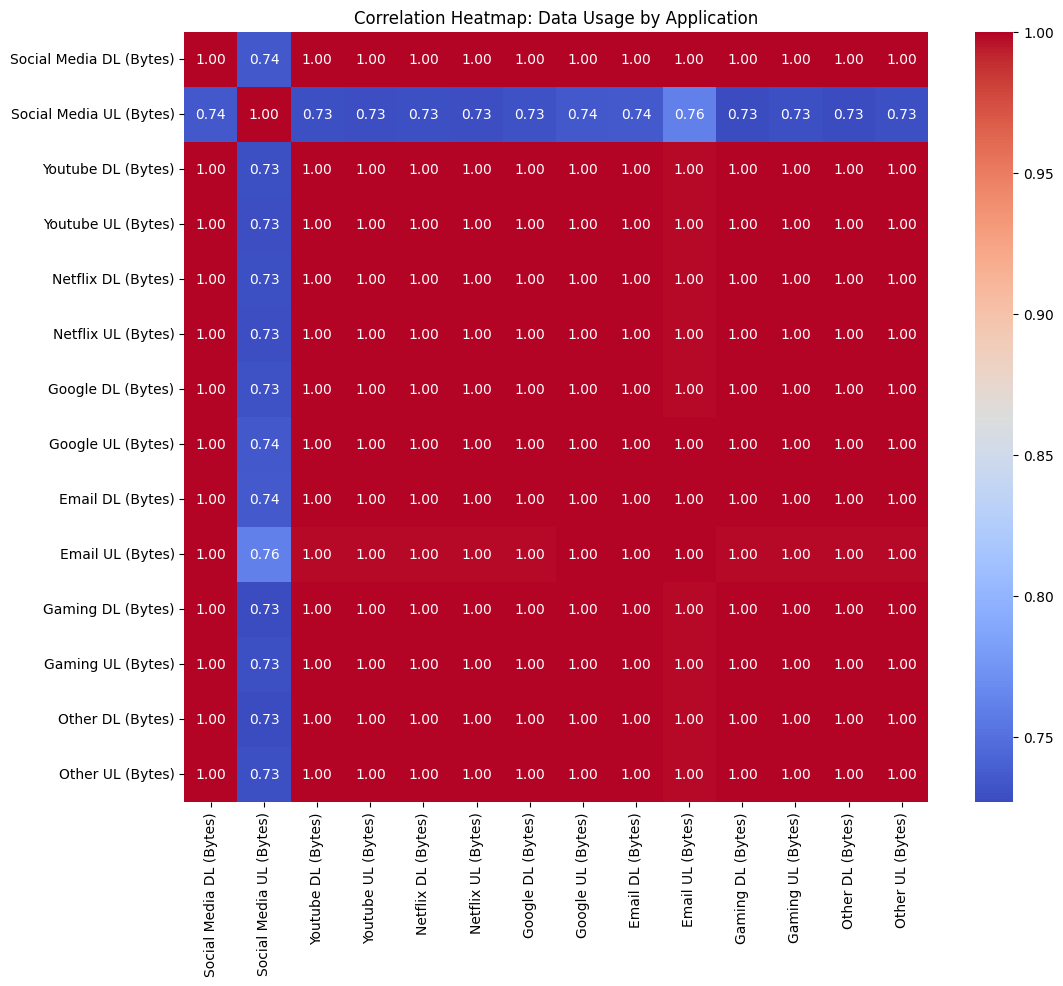

In [55]:
selected_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                     'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                     'Google DL (Bytes)', 'Google UL (Bytes)',
                     'Email DL (Bytes)', 'Email UL (Bytes)',
                     'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                     'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a new DataFrame with selected columns
selected_data = summary_statistics[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Data Usage by Application')
plt.show()

In [ ]:
selected_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                     'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                     'Google DL (Bytes)', 'Google UL (Bytes)',
                     'Email DL (Bytes)', 'Email UL (Bytes)',
                     'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                     'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Separate numerical and categorical columns
numerical_columns = selected_data.select_dtypes(include=['float64']).columns
categorical_columns = selected_data.select_dtypes(include=['object']).columns

# Fill NaN values with median for numerical columns
selected_data[numerical_columns] = selected_data[numerical_columns].fillna(selected_data[numerical_columns].median())

# Fill NaN values with mode for categorical columns
selected_data[categorical_columns] = selected_data[categorical_columns].fillna(selected_data[categorical_columns].mode().iloc[0])

# Transpose the data to have samples as rows and features as columns
selected_data_transposed = selected_data.T

# Standardize the transposed data (mean=0 and variance=1)
standardized_data_transposed = (selected_data_transposed - selected_data_transposed.mean()) / selected_data_transposed.std()

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data_transposed)

# Create a DataFrame with principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(selected_columns))])

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

In [64]:
sessions_frequency = df.groupby('MSISDN/Number')['Dur. (ms).1'].count().reset_index()
sessions_frequency.columns = ['MSISDN/Number', 'Sessions Frequency']

In [65]:
duration_of_session = df.groupby('MSISDN/Number')['Dur. (ms).1'].sum().reset_index()
duration_of_session.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

In [67]:
total_traffic = df.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()
total_traffic['Total Session Traffic (Bytes)'] = total_traffic['Total DL (Bytes)'] + total_traffic['Total UL (Bytes)']
total_traffic = total_traffic[['MSISDN/Number', 'Total Session Traffic (Bytes)']]

In [68]:
user_engagement = pd.merge(sessions_frequency, duration_of_session, on='MSISDN/Number')
user_engagement = pd.merge(user_engagement, total_traffic, on='MSISDN/Number')

In [69]:
user_engagement

,MSISDN/Number,Sessions Frequency,Total Session Duration (ms),Total Session Traffic (Bytes)
0,3.360100e+10,1,116720140.0,8.786906e+08
1,3.360100e+10,1,181230963.0,1.568596e+08
2,3.360100e+10,1,134969374.0,5.959665e+08
3,3.360101e+10,1,49878024.0,4.223207e+08
4,3.360101e+10,2,37104453.0,1.457411e+09
...,...,...,...,...
106851,3.379000e+10,1,8810688.0,7.146416e+08
106852,3.379000e+10,1,140988659.0,4.803073e+08
106853,3.197021e+12,1,877385325.0,2.321240e+08
106854,3.370000e+14,1,253030201.0,5.962878e+08


In [70]:
# Aggregate metrics per customer
user_engagement = pd.merge(sessions_frequency, duration_of_session, on='MSISDN/Number')
user_engagement = pd.merge(user_engagement, total_traffic, on='MSISDN/Number')

# Report top 10 customers for each metric
top_10_duration = user_engagement.nlargest(10, 'Total Session Duration (ms)')
top_10_frequency = user_engagement.nlargest(10, 'Sessions Frequency')
top_10_traffic = user_engagement.nlargest(10, 'Total Session Traffic (Bytes)')

In [71]:
top_10_traffic

,MSISDN/Number,Sessions Frequency,Total Session Duration (ms),Total Session Traffic (Bytes)
6437,3.361489e+10,17,9.966906e+09,8.846226e+09
92923,3.376054e+10,15,9.279442e+09,8.514774e+09
13180,3.362578e+10,17,1.855376e+10,8.499621e+09
13526,3.362632e+10,18,8.791937e+09,7.971167e+09
76363,3.367588e+10,15,4.865954e+09,7.891111e+09
37052,3.365973e+10,16,4.035436e+09,7.705863e+09
63028,3.366646e+10,11,4.536764e+09,7.308501e+09
92577,3.376041e+10,12,5.321674e+09,7.132371e+09
57241,3.366471e+10,11,2.927790e+09,6.872018e+09
86455,3.369879e+10,11,5.169134e+09,6.540899e+09


In [73]:
# Extract engagement metrics for clustering
engagement_metrics = user_engagement[['Sessions Frequency', 'Total Session Duration (ms)', 'Total Session Traffic (Bytes)']]

# Normalize metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Run K-Means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute non-normalized metrics for each cluster
cluster_metrics = user_engagement.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Session Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [75]:
application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                         'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                         'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                         'Google DL (Bytes)', 'Google UL (Bytes)',
                         'Email DL (Bytes)', 'Email UL (Bytes)',
                         'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                         'Other DL (Bytes)', 'Other UL (Bytes)']
# Aggregate user total traffic per application
user_application_traffic = df.groupby('MSISDN/Number')[application_columns].sum().reset_index()

# Derive top 10 most engaged users per application
top_10_users_per_application = {}
for column in application_columns:
    top_10_users = user_application_traffic.nlargest(10, column)
    top_10_users_per_application[column] = top_10_users

In [76]:
print(top_10_users_per_application)

{'Social Media DL (Bytes)':         MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)  \
13526    3.362632e+10               42743837.0                 630942.0   
92923    3.376054e+10               39297646.0                 485543.0   
37052    3.365973e+10               34900444.0                 511914.0   
6437     3.361489e+10               27749744.0                 544800.0   
13180    3.362578e+10               26564121.0                 571379.0   
65118    3.366716e+10               23753753.0                 494097.0   
106137   3.378632e+10               23568655.0                 406264.0   
70960    3.366907e+10               23477047.0                 323787.0   
666      3.360313e+10               22776679.0                 301146.0   
31331    3.365849e+10               22695673.0                 304393.0   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
13526          164048706.0         210434341.0         199479238.0   
92923 

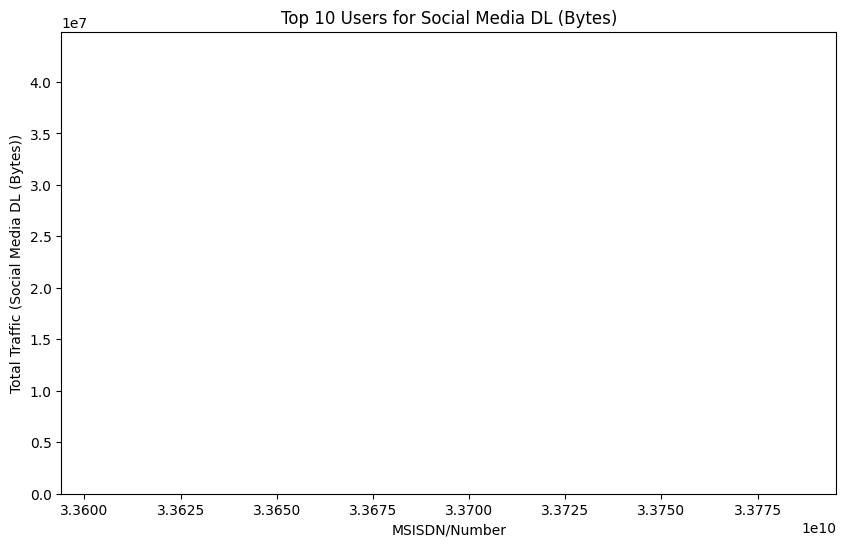

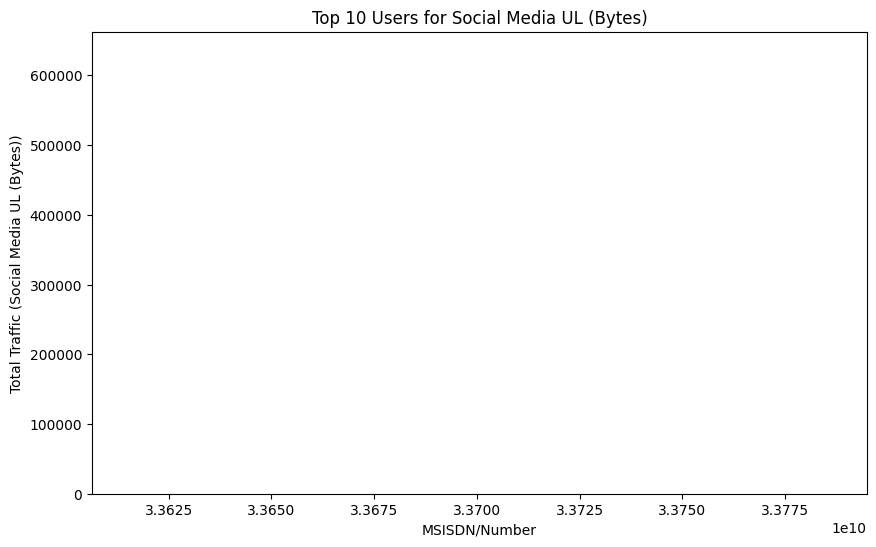

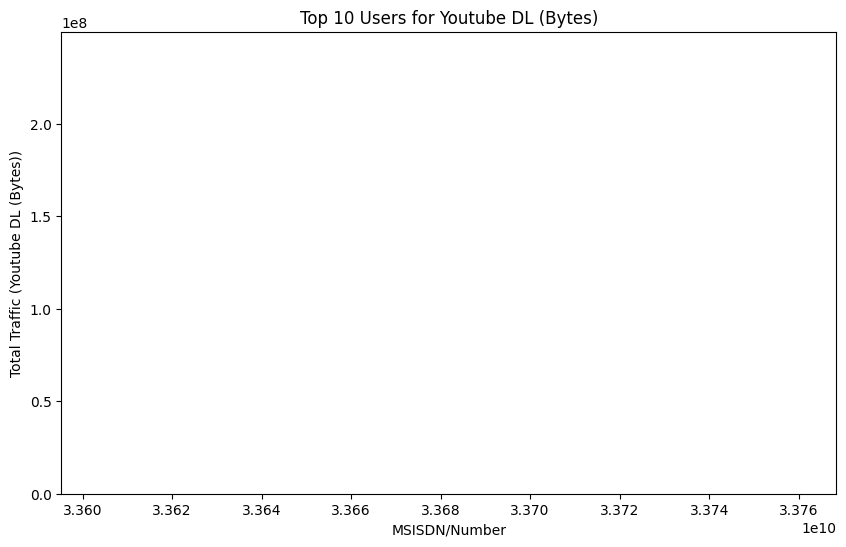

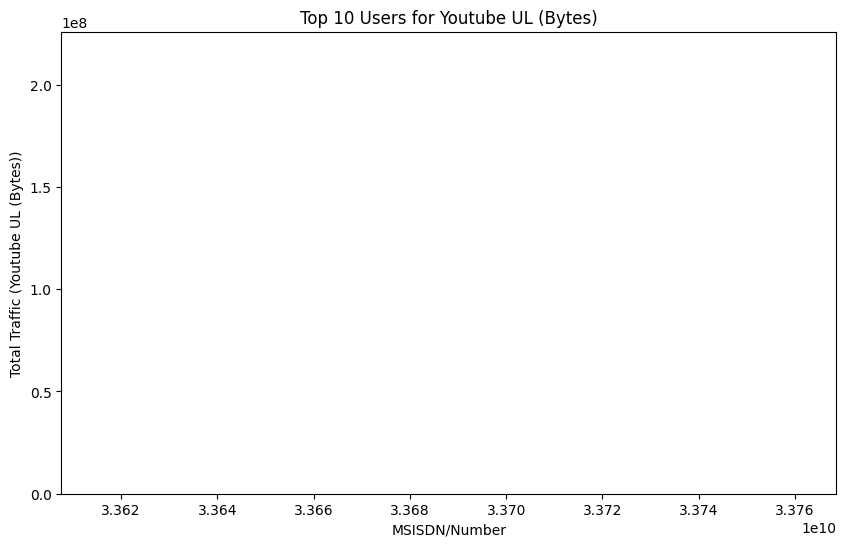

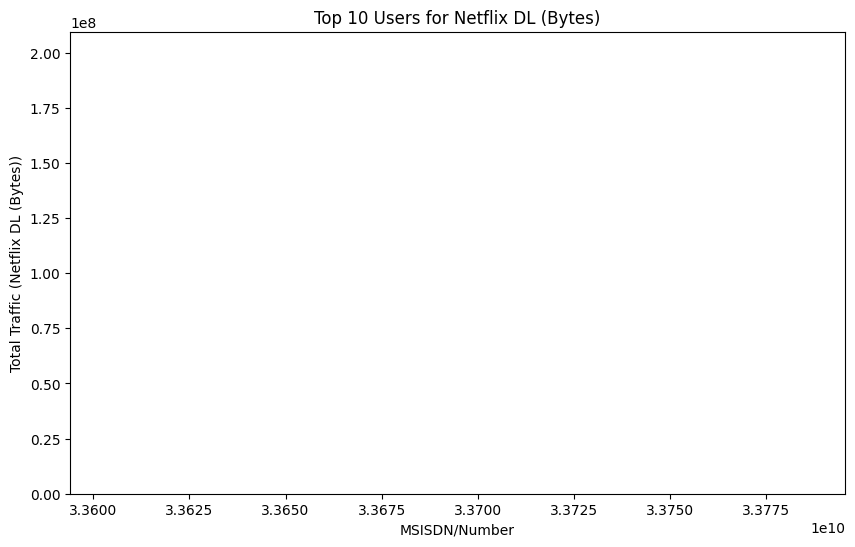

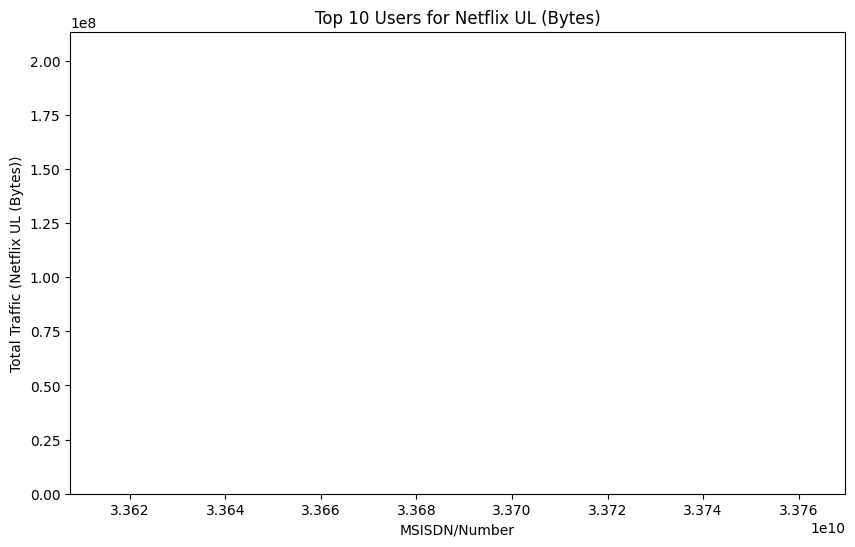

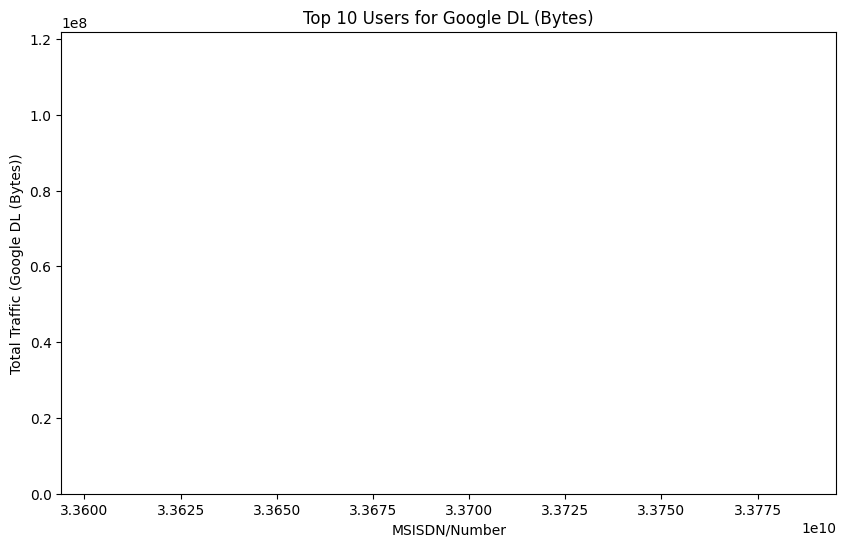

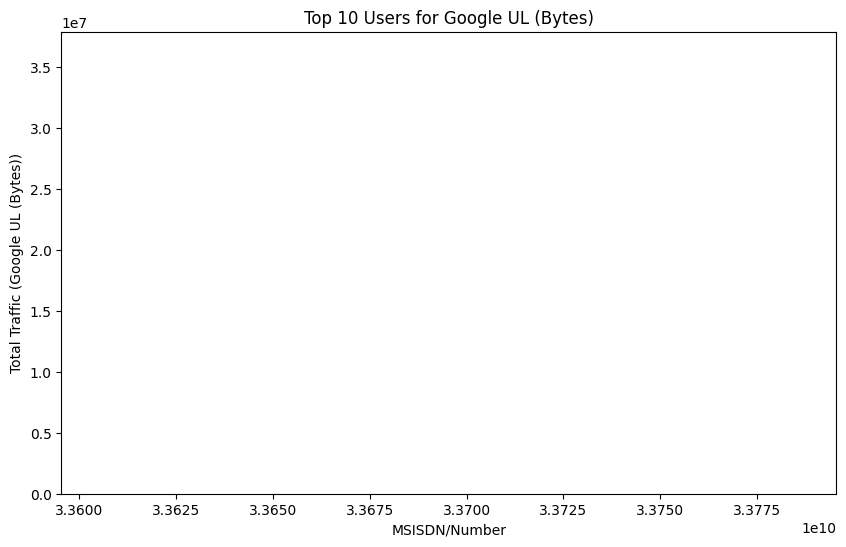

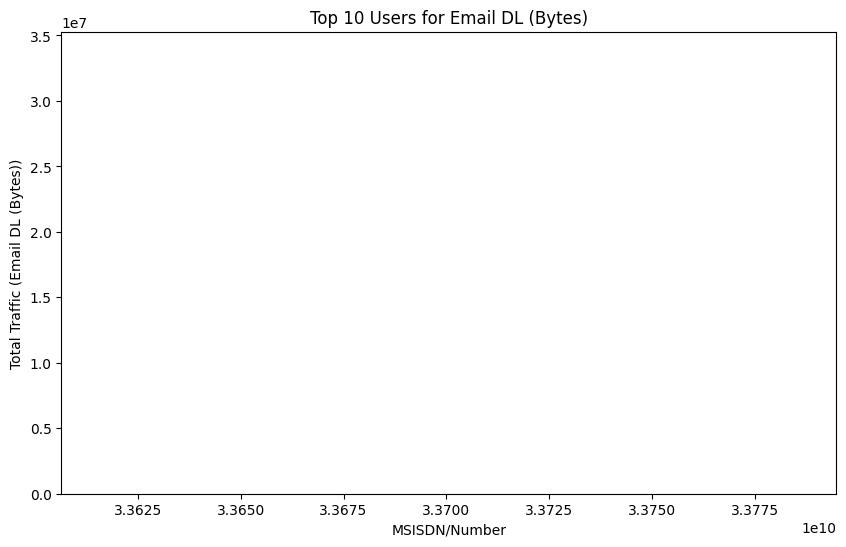

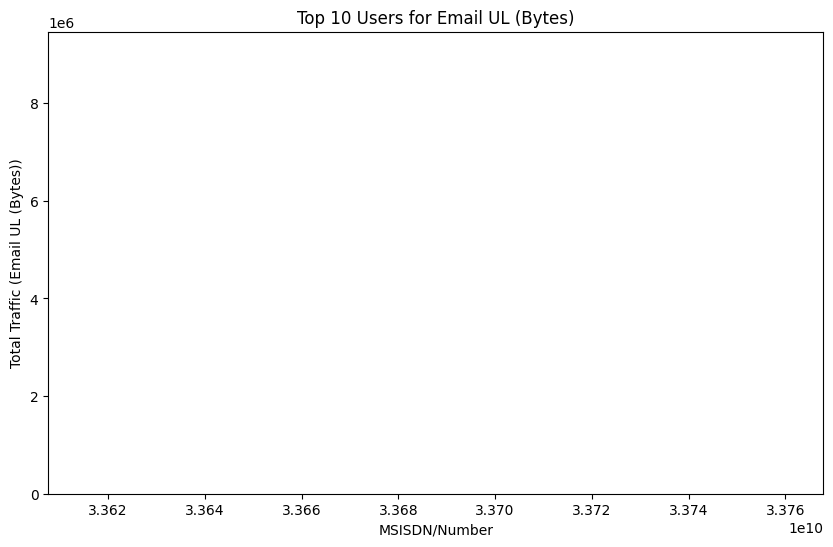

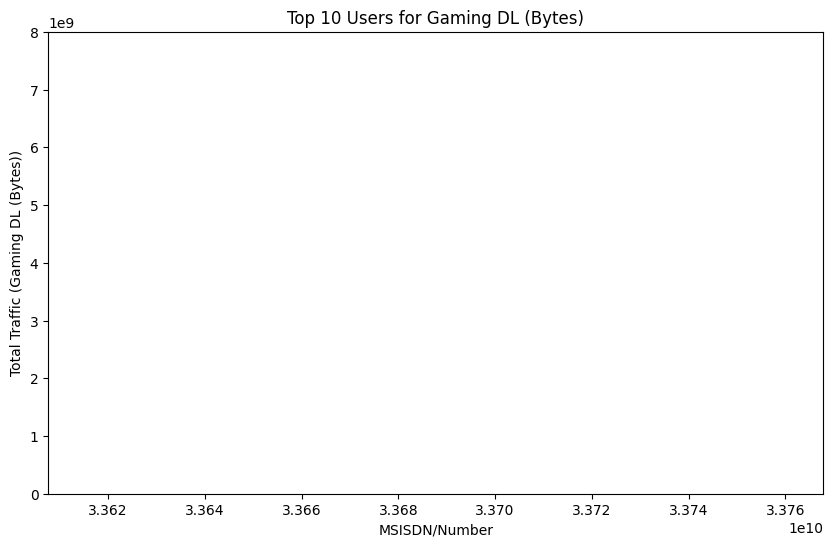

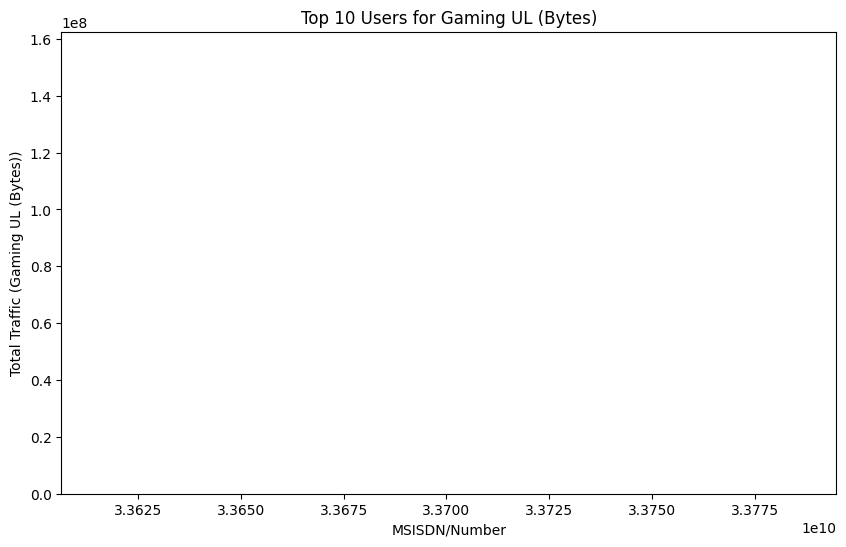

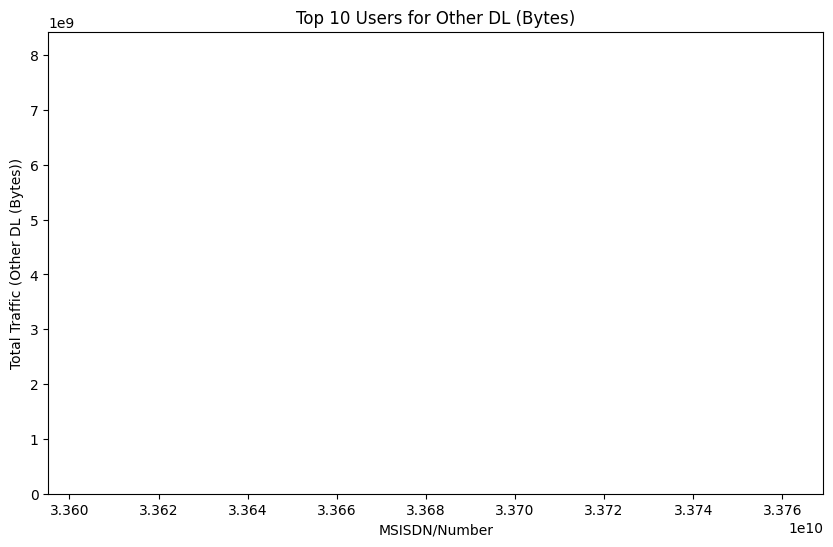

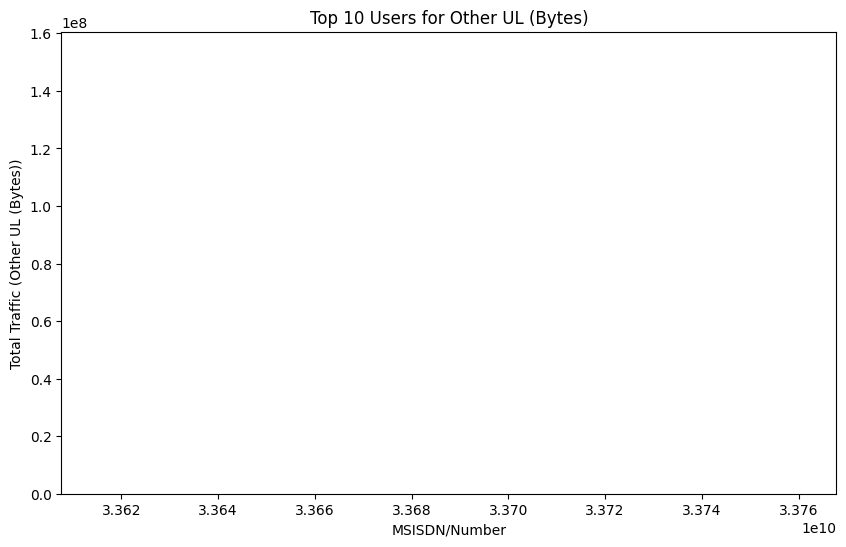

In [80]:
for column in top_10_users_per_application:
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_users_per_application[column]['MSISDN/Number'], top_10_users_per_application[column][column])
    plt.title(f'Top 10 Users for {column}')
    plt.xlabel('MSISDN/Number')
    plt.ylabel(f'Total Traffic ({column})')
    plt.show()

C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amanu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

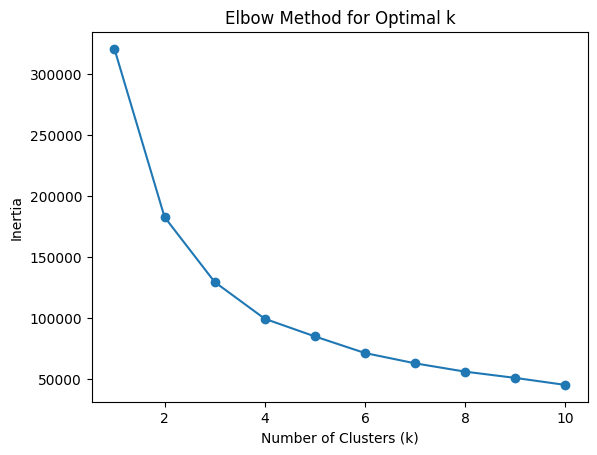

In [81]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()